Linear Regression


In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loading dataset
regression = pd.read_csv("score.csv")
print("data imported successfully")
regression.head(10)


data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#understanding data
regression.shape

(25, 2)

In [6]:
regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
regression.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
regression.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
regression.isna().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#finding correlation of dependent and independent variables
regression.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


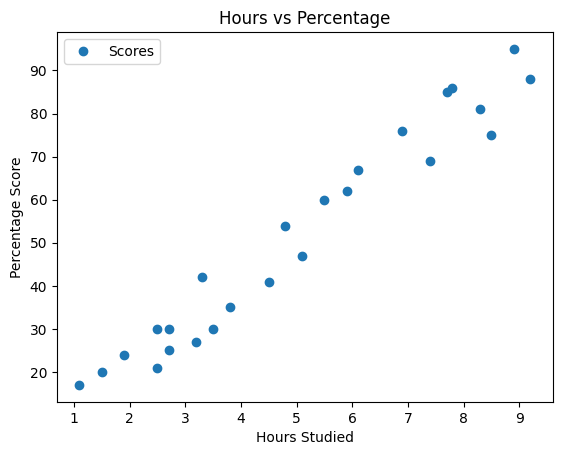

In [11]:
#plotting data to check if relationship is linear
import matplotlib.pyplot as plt

regression.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


In [12]:
from re import X
x_regression = regression.iloc[:,:-1].values
y_regression = regression.iloc[:,1].values

#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_regression, y_regression, test_size=0.2, random_state=20)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#fitting data
regressor.fit(x_train, y_train)
print("training complete")

training complete


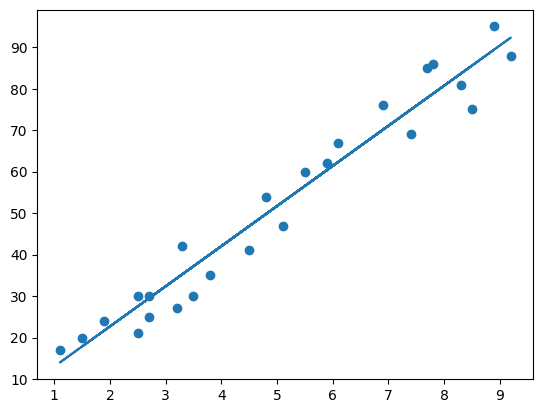

In [13]:
#plotting regression line y=mx+c
line = regressor.coef_*x_regression+regressor.intercept_

#plotting test data
plt.scatter(x_regression, y_regression)
plt.plot(x_regression, line);
plt.show()

In [14]:
print(x_test) # testing data in hours
y_pred = regressor.predict(x_test) #predicting scores


[[7.4]
 [6.9]
 [4.5]
 [3.5]
 [6.1]]


In [15]:
#comparing actual and predicted data
df = pd.DataFrame({'actual' : y_test, 'predicted' : y_pred})
df

,actual,predicted
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


In [16]:
regressor.score(x_train,y_train)

0.9596371297881153

In [17]:
#calculate error in model
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))

mean absolute error: 5.910844306461269


R2 (coefficient of determination)
regression score function

In [18]:
print('r2 score:', metrics.r2_score(y_test, y_pred))

r2 score: 0.8880613623447959


In [19]:
x_axis = range(len(y_test))
x_axis

range(0, 5)

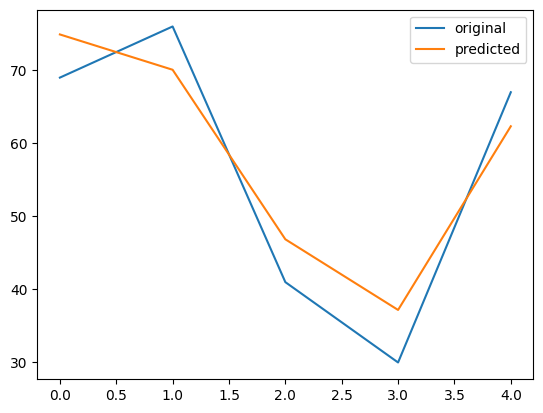

In [20]:
#plotting the values to visualize how well our model works
plt.plot(x_axis, y_test, label='original')
plt.plot(x_axis, y_pred, label='predicted')
plt.legend()
plt.show()

End of Linear Regression